# GitHub Insights

In this notebook I will show the insights about my Repository

# Import Libraries and Data from Csv file 

I will import required libraries, here I used seaborn to draw graphs with colorful colors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
repository_info = pd.read_csv('repository_info.csv')
commits_info = pd.read_csv('commit_info.csv')

# Basic Insight

I will start with number of Repository and total commits across all Repository

In [3]:
print("Total repos till date: {}".format(len(repository_info)))
print("Total commits till date: {}".format(len(commits_info)))

Total repos till date: 15
Total commits till date: 139


In [4]:
common_message = commits_info['Commit Message'].value_counts().index[:1][0]
print("Most common commit messages: {}".format(common_message))

Most common commit messages: Initial commit


It seems I mostly use default commit message of Github while creating Repository

# Commits counts in each repository

I will start with geting the commits count for each repository using Repostory_info and commits_info data

In [5]:
commit_count = pd.merge(repository_info,commits_info,on=['Id']).groupby('Id').size().reset_index()
commit_count.columns = ['Id', 'Commit count']

Next thing would be combinig the repository_info and commit_count on the basis of Id( here id is nothing but Repository Id)

In [6]:
repository_info = pd.merge(repository_info,commit_count,on=['Id'],how = 'left')

Text(0.5,1,'Commits per Repository')

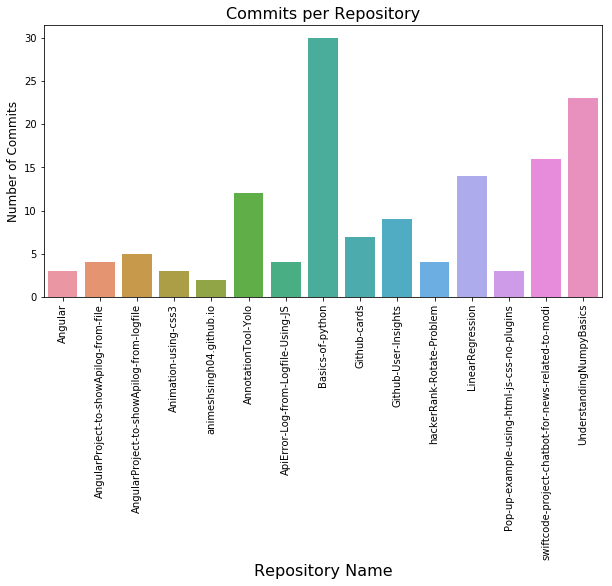

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(repository_info['Name'], repository_info['Commit count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository Name", fontsize = 16)
plt.ylabel("Number of Commits", fontsize = 12)
plt.title("Commits per Repository", fontsize = 16)

The maximum commits is in <strong>Basics-of-python</strong>, which is tutorial based on one of Coursera Course.

# Yearly Analysis of Commits

Now we will start with yearly stats of commits and I expect maximum commits in 2020 and 2017 year as I created a GitHub account back in 2017 when I was in college and started working on Projects.

In [8]:
commits_info['Year'] = commits_info['Commited on'].apply(lambda x: x[:4])
yearly_commits = commits_info['Commited on'].apply(lambda x: x[:4]).value_counts()

Text(0.5,1,'Commits per Year')

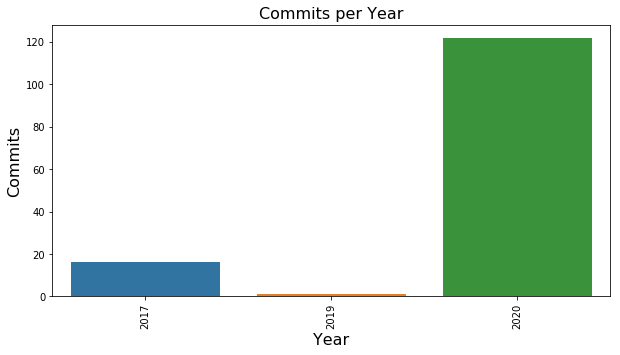

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(yearly_commits.index, yearly_commits.values)
plt.xticks(rotation = 90)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per Year", fontsize = 16)

# Commits in each month of 2020

Now, I would like to see insights on commits on each month of year 2020

In [10]:
commits_info['Month'] = commits_info['Commited on'].apply(lambda x: x[5:7])
monthly_commits = commits_info[commits_info['Year']=='2020'].groupby('Month').count()['Id']

In [11]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June',
                '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'Novmeber', '12': 'December'
               }

In [12]:
month_labels = []
for value in monthly_commits.index:
    month_labels.append(month_mapper[value])

Text(0.5,1,'Commits per Month')

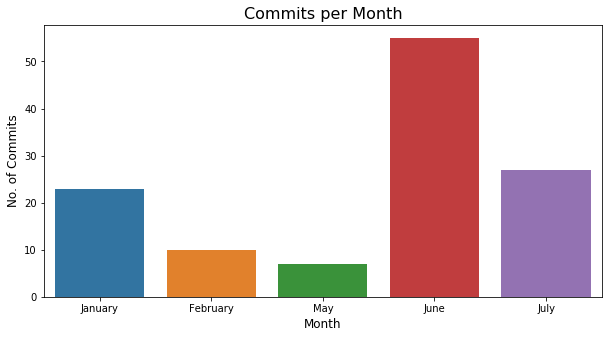

In [13]:
plt.figure(figsize = (10,5))
plot = sns.barplot(monthly_commits.index, monthly_commits.values)
plot.set_xticklabels(month_labels)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Commits per Month", fontsize = 16)

I made maximum commits in month of <strong>june 2020 </strong>

# Commits  on each day of year 2020

Now,I would also like to see commits on each day of year 2020

In [14]:
commits_info['Date'] = commits_info['Commited on'].apply(lambda x: x[0:10])
daily_commits = commits_info[(commits_info['Year']=='2020')].groupby('Date').size()

In [15]:
date_labels=[]
for value in daily_commits.index:
    date_labels.append(value)

Text(0.5,1,'Daily Commits on Each Day of 2020')

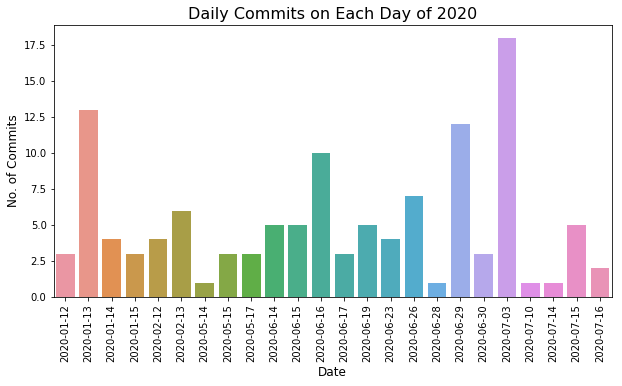

In [16]:
plt.figure(figsize = (10,5))
plot = sns.barplot(daily_commits.index, daily_commits.values)
plot.set_xticklabels(date_labels)
plt.xticks(rotation = 90)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Daily Commits on Each Day of 2020", fontsize = 16)

As you can see the maximum number of commit is on <strong>3rd of july</strong> and second maximum on <strong>13nth of Jan</strong>

# Most Language used

We can also get an insight about the language used across each repository and most common language used

In [17]:
data = []
language_list = repository_info['Language'].str.split(',')
for i in range(len(language_list)):
    data = data + language_list[i]
for i,item in enumerate(data):
    data[i] = item.strip()

In [18]:
languages = pd.DataFrame(data,columns=['Language'])
languages = languages.groupby('Language').size()
languages

Language
CSS                  7
HTML                10
Java                 1
JavaScript           9
Jupyter Notebook     5
Python               1
Scala                1
TypeScript           1
dtype: int64

Text(0.5,1,'Language distribution among all the Repositories')

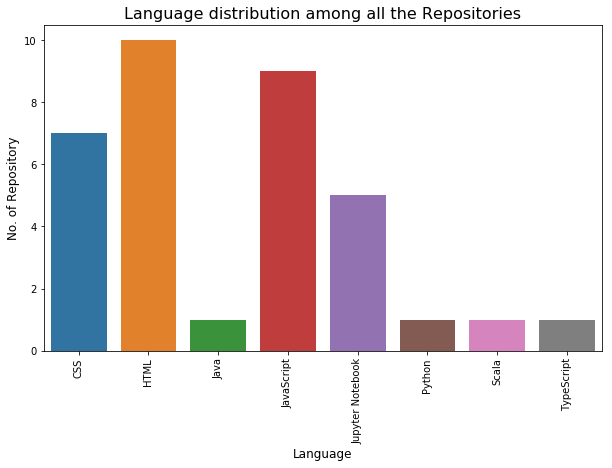

In [19]:
plt.figure(figsize = (10,6))
plot = sns.barplot(languages.index, languages.values)
plt.xticks(rotation = 90)
plt.xlabel("Language", fontsize = 12)
plt.ylabel("No. of Repository", fontsize = 12)
plt.title("Language distribution among all the Repositories", fontsize = 16)

I have worked on variety of languages which includes <strong>JavaScript and Jupyter Notebook </strong>(which is nothing but Pyhton) but most is <strong>Python , javascript and HTML </strong>